## 1、Question(提出问题)

In [1]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame

#用pandas.read_csv()方法读入本地的csv格式
#读入后数据的类型默认是DataFrame
data_train = pd.read_csv('titanic-data.csv') #原数据，在后面不会更改，用于与数据清理后的对比
test_train = pd.read_csv('titanic-data.csv') #用于数据清理
data_train.head() #用DataFrame.head()方法得到它的前几行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data_train.shape #返回行列数目

(891, 12)

### 观察以上数据，简要分析下：

- #### 理解列名：
PassengerId => 乘客ID，不可影响生还，忽略<br>
Survived => 获救情况（1为获救，0为未获救）<br>
Pclass => 乘客等级/船舱等级(1/2/3等舱位),这个较可能影响获救，权贵容易特殊照顾<br>
Name => 乘客姓名，感觉不能影响获救，忽略<br>
Sex => 性别，女性易受保护，有可能<br>
Age => 年龄，有可能<br>
SibSp => 堂兄弟/妹个数，有可能<br>
Parch => 父母与小孩个数，有可能<br>
Ticket => 船票信息，票编号 感觉不可能<br>
Fare => 票价，有可能，高价可代表着权贵<br>
Cabin => 客舱，有可能，因为可能距离救生艇的距离近容易获救<br>
Embarked => 登船港口，有可能，比如：发达的港口代表着地位不一样<br>

###### 所以，大概知道需要提取哪些列的信息了，有：
    Pclass、Sex、Age、SibSp、Parch、Fare、Cabin、Embarked


In [3]:
data_train.info() #用DataFrame.info()方法得到它的列变量信息。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 由`data_train.info()`可知，Age, Cabin, Embarked, 信息不全，没达到891条


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2、数据整理
根据以上信息可知，首先，Age、Cabin、Embarked 变量存在缺失值。其中Embarked和Age的缺失值较少，可以直接用众数和中位数插补。
### 2.1、Cabin的缺失值较多，可以考虑比较有Cabin数据和无Cabin数据的乘客存活情况

In [6]:
# 获取 Cabin 为空的数据
nan_cabin = data_train[data_train['Cabin'].isnull()==True]
nan_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


- 分类‘Cabin有数据’为1、‘Cabin无数据’为0，对数据集进行填充

In [7]:
# 对test_train中Cabin 空值 填0 ，非空值 填1
test_train.loc[test_train['Cabin'].isnull() == False,'Cabin'] = 1
print data_train.head()
test_train.loc[test_train['Cabin'].isnull(),'Cabin'] = 0
print test_train.head()
data_train.head()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
import matplotlib.pyplot as plt

# 看看有Cabin、无Cabin情况下获救率
cabin_survive = pd.pivot_table(test_train, index = ['Cabin'], values= ['Survived'])
print cabin_survive
cabin_survive.plot(kind='bar', stacked=True)

# pd.pivot_table(test_train,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))  
# plt.title('Survival Rate')

       Survived
Cabin          
0      0.299854
1      0.666667


上图显示，在有Cabin数据的乘客的存活率远高于无Cabin数据的乘客，所以我们可以将Cabin的有无数据作为一个特征。

### 2.2 对于Age列的缺失值，使用median（）函数获取中间值 进行填充

In [48]:
# 对Age列 空值 填充 均值
test_train['Age']=test_train['Age'].fillna(test_train['Age'].median())   #fillna（）表示补充
test_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.3 把"Sex"这一列的数据 进行分类 1、0，即改为数值型。把"male"和“female”进行处理，分别用0和1替代

In [49]:
#loc是通过行标签索引行数据，iloc是通过行号获取行数据
test_train.loc[test_train['Sex']=='male','Sex']=0  
test_train.loc[test_train['Sex']=='female','Sex']=1 

### 2.4 同时，我们也把"Embarked"这一列数据进行同样的数值分类处理：

In [50]:
print(test_train['Embarked'].unique()) 

def sub_by_value(df, column, value):
    return df.loc[df[column]==value, column]

print len(sub_by_value(test_train, 'Embarked', 'S')) #644
print len(sub_by_value(test_train, 'Embarked', 'C')) #168
print len(sub_by_value(test_train, 'Embarked', 'Q')) #77

test_train['Embarked']=test_train['Embarked'].fillna('S')  
test_train.loc[test_train['Embarked']=='S','Embarked']=0  
test_train.loc[test_train['Embarked']=='C','Embarked']=1  
test_train.loc[test_train['Embarked']=='Q','Embarked']=2  

print(test_train['Embarked'].unique()) 

['S' 'C' 'Q' nan]
644
168
77
[0 1 2]


In [198]:
#为 确保 不在 NAN值，使用nans_of_data获取nan值数据，校验
def nans_of_data(df, column):
    return df.loc[df[column].isnull(), column]

print len(nans_of_data(test_train, 'Cabin'))
# print len(nans_of_data(data_train, 'Cabin'))
print len(nans_of_data(test_train, 'Age'))
print len(nans_of_data(test_train, 'Embarked'))

# nan_cabin_test = test_train[test_train['Cabin'].isnull()==True]
# nan_cabin_data = data_train[data_train['Cabin'].isnull()==True]
# print len(nan_cabin_test)
# print len(nan_cabin_data)

test_train.head(10)

0
0
0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,1


In [51]:
# 获取原数据，与清理后的数据test_train进行对比
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 到这里，数据中已无缺失值。

## 3、数据初步分析
#### 由`data_train.describe()`可知:
- 获救占比为0.383838
- `Age`小于38岁占比75%，平均年龄才29.699118
- 一等舱人数偏少，不到25%

#### 上面信息量太有限，接下来看看每个/多个 属性和最后的Survived之间有着什么样的关系，用统计、图表瞧瞧

### 3.1、乘客各属性分布

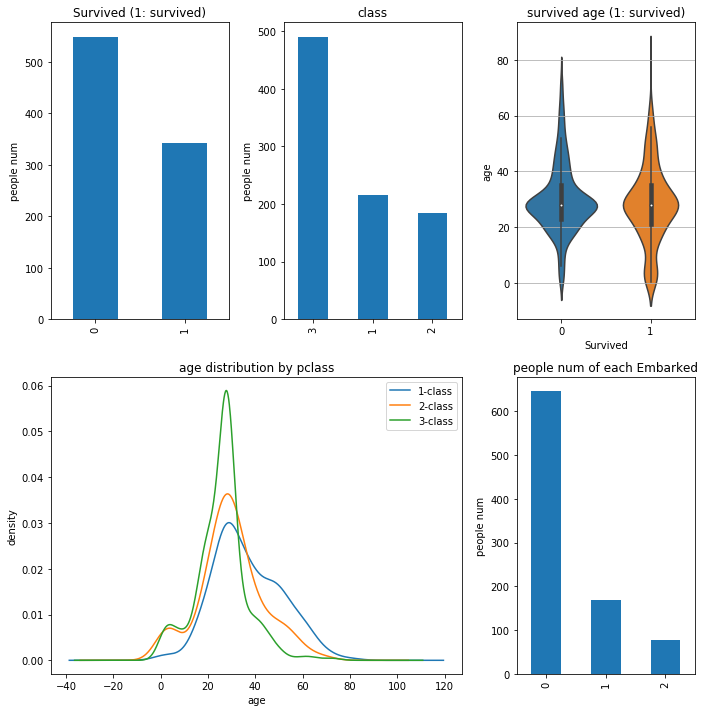

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=[10,10])
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 获救数目分布
plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
test_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"Survived (1: survived)") # 标题
plt.ylabel(u"people num")  


# 乘客等级分布
plt.subplot2grid((2,3),(0,1))
test_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"people num")
plt.title(u"class")


# 按年龄看获救分布
plt.subplot2grid((2,3),(0,2))
# plt.scatter(test_train.Survived, test_train.Age)
sns.violinplot(x='Survived', y='Age', data=test_train)
plt.ylabel(u"age")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title(u"survived age (1: survived)")


# 各等级的乘客年龄分布 密度
plt.subplot2grid((2,3),(1,0), colspan=2)
test_train.Age[test_train.Pclass == 1].plot(kind='kde')   # 密度
test_train.Age[test_train.Pclass == 2].plot(kind='kde')
test_train.Age[test_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age") # plots an axis lable
plt.ylabel(u"density") 
plt.title(u"age distribution by pclass")
plt.legend((u'1-class', u'2-class',u'3-class'),loc='best') # sets our legend for our graph.


# 各登船口岸上船人数
plt.subplot2grid((2,3),(1,2))
test_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"people num of each Embarked")
plt.ylabel(u"people num")  

plt.tight_layout() # 调整间距
plt.show()



#### 图上可以看出：
- 获救人数300多，不超过50%；
- 3等舱 乘客最多
- 遇难者、获救者 年龄跨度都很广
- 3个不同的舱年龄总体趋势似乎也一致
- 登船港口人数 按照S、C、Q递减，而且S远多于另外俩港口。

### 3.2、属性与获救结果关联统计

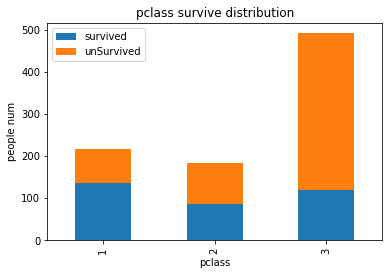

In [154]:
#看看各乘客等级的获救情况
Survived_0 = test_train.Pclass[test_train.Survived == 0].value_counts()
Survived_1 = test_train.Pclass[test_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'unSurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"pclass survive distribution")
plt.xlabel(u"pclass") 
plt.ylabel(u"people num") 
plt.show()

#### 可见：明显等级为1的乘客，获救的概率高很多

0    468
1    109
Name: Survived, dtype: int64
1    233
0     81
Name: Survived, dtype: int64


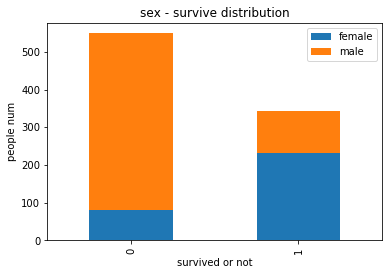

In [157]:
#看看各性别的获救情况


# Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
# Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

Survived_m = test_train.Survived[test_train.Sex == 0].value_counts()
print Survived_m
Survived_f = test_train.Survived[test_train.Sex == 1].value_counts()
print Survived_f
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"sex - survive distribution")
plt.xlabel(u"survived or not") 
plt.ylabel(u"people num")
plt.show()

#### 可见，未获救的人中 男性占比远大于女性，获救的人中 女性占比远大于男性

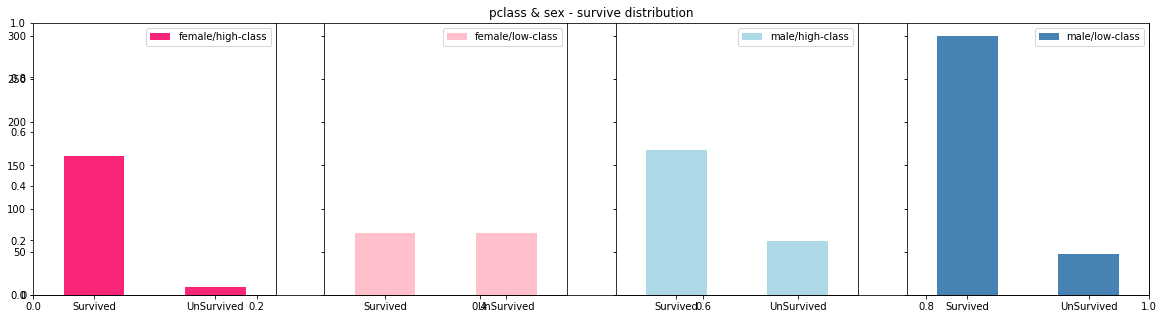

In [171]:
#然后我们再来看看各种舱级别情况下各性别的获救情况

from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  

fig = plt.figure(figsize=[20,5])
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"pclass & sex - survive distribution") # 根据舱等级和性别的获救情况

ax1=fig.add_subplot(141)
test_train.Survived[test_train.Sex == 1][test_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"Survived", u"UnSurvived"], rotation=0)
ax1.legend([u"female/high-class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
test_train.Survived[test_train.Sex == 1][test_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"Survived", u"UnSurvived"], rotation=0)
plt.legend([u"female/low-class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
test_train.Survived[test_train.Sex == 0][test_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"Survived", u"UnSurvived"], rotation=0)
plt.legend([u"male/high-class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
test_train.Survived[test_train.Sex == 0][test_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"Survived", u"UnSurvived"], rotation=0)
plt.legend([u"male/low-class"], loc='best')

plt.show()

#### 看图更加证明，女性、高级仓 获救率之高

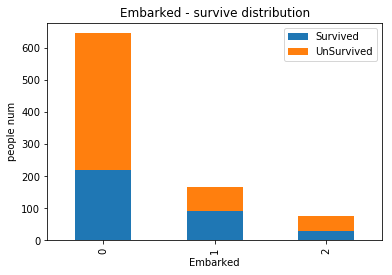

In [173]:
# 我们看看各登船港口的获救情况。

Survived_0 = test_train.Embarked[test_train.Survived == 0].value_counts()
Survived_1 = test_train.Embarked[test_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'UnSurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Embarked - survive distribution")
plt.xlabel(u"Embarked") 
plt.ylabel(u"people num") 

plt.show()

#### 没明显特征

In [176]:
# 下面我们来看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响。

g = test_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df

g = test_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


#### 对比数据，没发现明显特征

### 3.3、相关性计算分析

In [200]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
#     print std_x.head(), '--', len(std_x)
#     print std_y.head(), '--', len(std_y)
#     print (std_x * std_y).head(), '--', len(std_x * std_y)
    
    return (std_x * std_y).mean()

Survived_s = test_train['Survived']
Sex_s = test_train['Sex']
Pclass_s = test_train['Pclass']
Age_s = test_train['Age']
Cabin_s = test_train['Cabin']

print correlation(Survived_s, Sex_s)
print correlation(Survived_s, Pclass_s)
print correlation(Survived_s, Age_s)
print correlation(Survived_s, Cabin_s)



0.5433513806577474
-0.338481035961
-0.0649104199305
0.3169115231122944


#### 可见，仍然是性别、等级，相关性最强，有客舱信息 相关性也较强

## 4 结论
#### 根据统计分布图、皮尔逊相关性，得出结论： ***女性、高级仓 获救率最高，即影响获救最重的因素是：Sex、Pclass***
******

参考网站：
    http://pandas.pydata.org/pandas-docs/stable/api.html
    https://blog.csdn.net/zhuhengv/article/details/50540254
    https://blog.csdn.net/vvvict0r/article/details/78165584
    https://blog.csdn.net/xun527/article/details/78578460
    https://www.cnblogs.com/mxwbq/p/7106123.html?utm_source=itdadao&utm_medium=referral
    https://blog.csdn.net/guoxinian/article/details/73740746
    https://blog.csdn.net/wydyttxs/article/details/76695205
    